In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Supermarket_customers.csv", sep='\t')
pd.set_option('display.max_columns', None)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
# fixing few columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO':'Single', 'Absurd':'Single', 'Alone':'Single'})

There are 24 missing values in the Income column. Let's try to predict these values.

In [5]:
# features, based on these we will predict the income
features = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Recency', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# feature engineering: categorical to bool values
df2 = pd.get_dummies(df[features], drop_first=True)

# this dataset contains only missing income rows : unlabelled dataset
missing_income_df = df2[df2['Income'].isnull()]
unlabelled_df = missing_income_df.drop(columns=['Income'])

# this dataset contains all the non missing income : train dataset
df_with_income = df2.dropna(subset=["Income"])

# splitting the training dataset
X_train = df_with_income.drop('Income', axis=1)
y_train = df_with_income["Income"]

model = LinearRegression()
model.fit(X_train, y_train)

# predict missing values
predicted_income = model.predict(unlabelled_df)

# create a new csv file
prediction = pd.DataFrame({
    'ID': unlabelled_df['ID'],
    'predicted_income': predicted_income
})

prediction.to_csv('predicted_income.csv', index=False, sep=';')


In [6]:
predicted_income = pd.read_csv('predicted_income.csv', sep=';')

# Joing the predicted income with the main df
df = df.merge(predicted_income, on='ID', how='left')

# combine_first picks the non null values first
df['Income'] = df['Income'].combine_first(df['predicted_income'])

# drop the predicted income column
df.drop('predicted_income', inplace=True, axis=1)

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [8]:
# creating age column
df['age'] = 2024 - df['Year_Birth']

# total_children
df['total_children'] = df['Kidhome'] + df['Teenhome']

# total_spendings
df["total_spending"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# total_num_of_purchases
df['num_purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

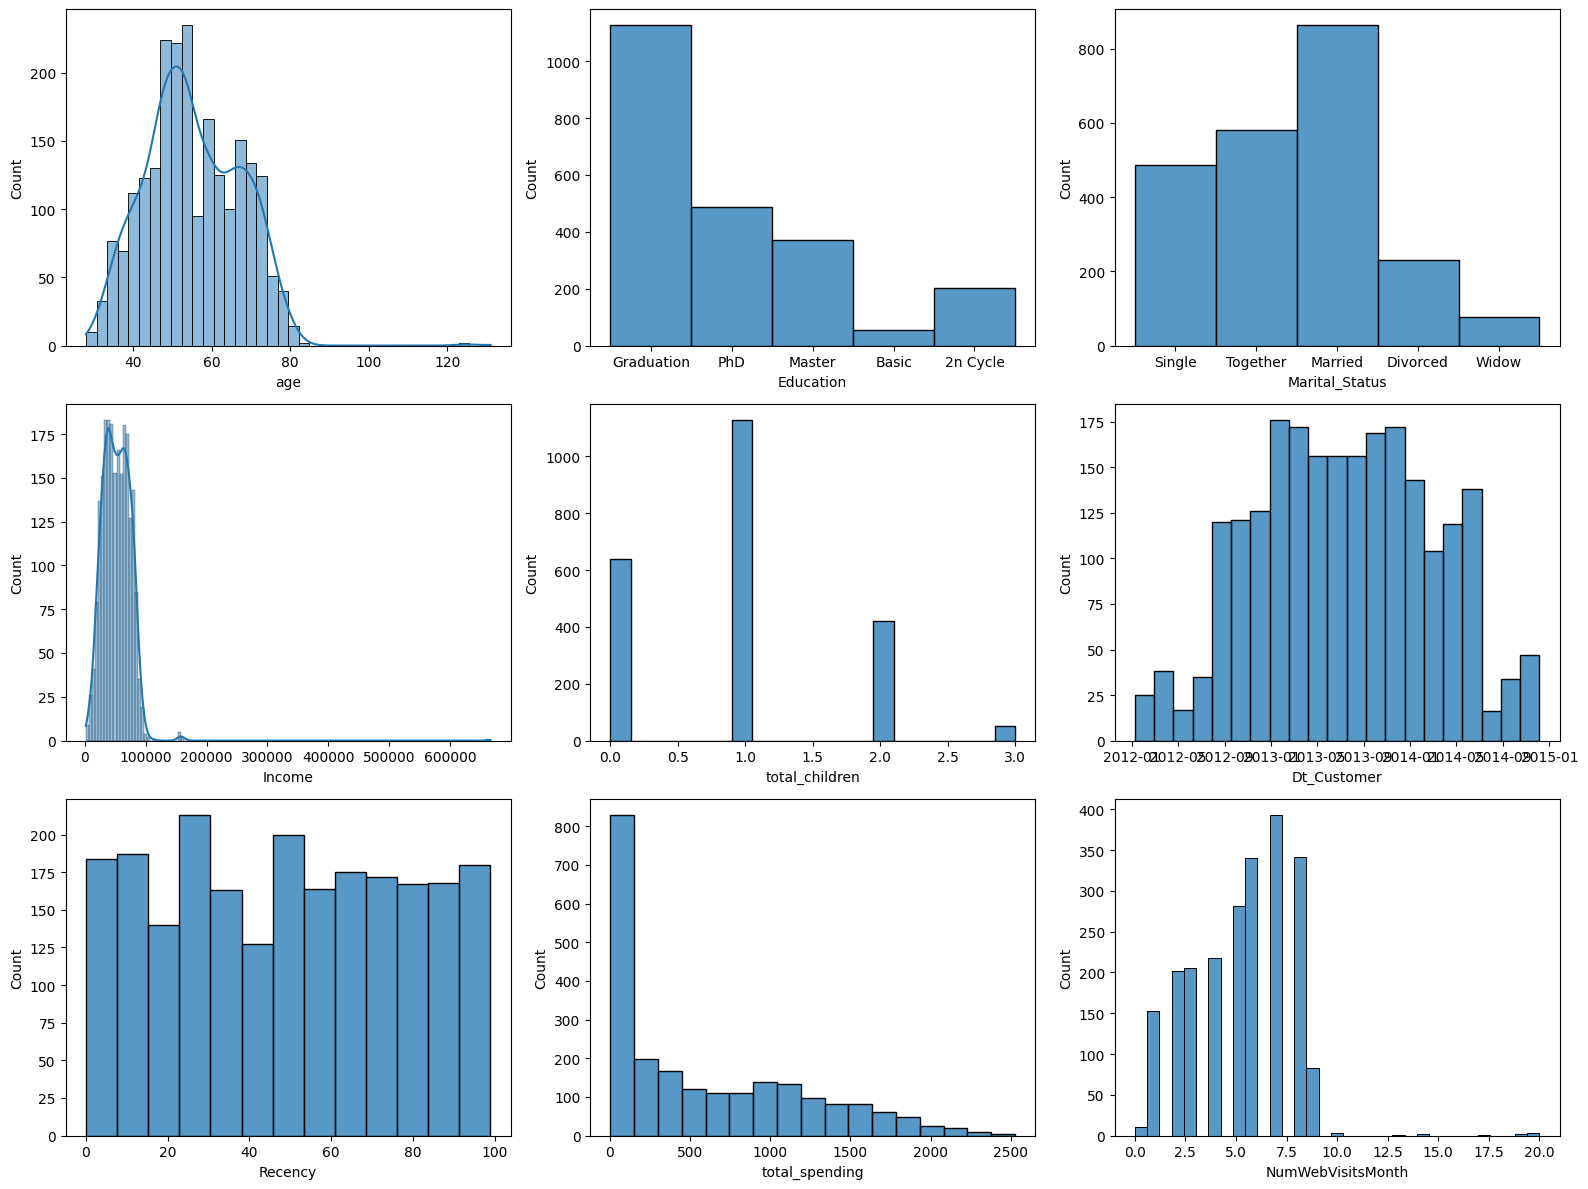

In [9]:
# visualization

fig, axes = plt.subplots(3,3, figsize=(16, 12))

sns.histplot(df['age'], kde=True, ax=axes[0, 0])

sns.histplot(df['Education'], ax=axes[0, 1])

sns.histplot(df['Marital_Status'], ax=axes[0, 2])

sns.histplot(df['Income'], kde=True, ax=axes[1, 0])

sns.histplot(df['total_children'], ax=axes[1, 1])

sns.histplot(df['Dt_Customer'], ax=axes[1, 2])

# No. of days since last purchase
sns.histplot(df['Recency'], ax=axes[2, 0])

sns.histplot(df['total_spending'], ax=axes[2, 1])

# no. of visits to the company's website in the last month
sns.histplot(df['NumWebVisitsMonth'], ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [10]:
# Deal with outliers in income and age
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

df = df[(df['age'] < 85)]

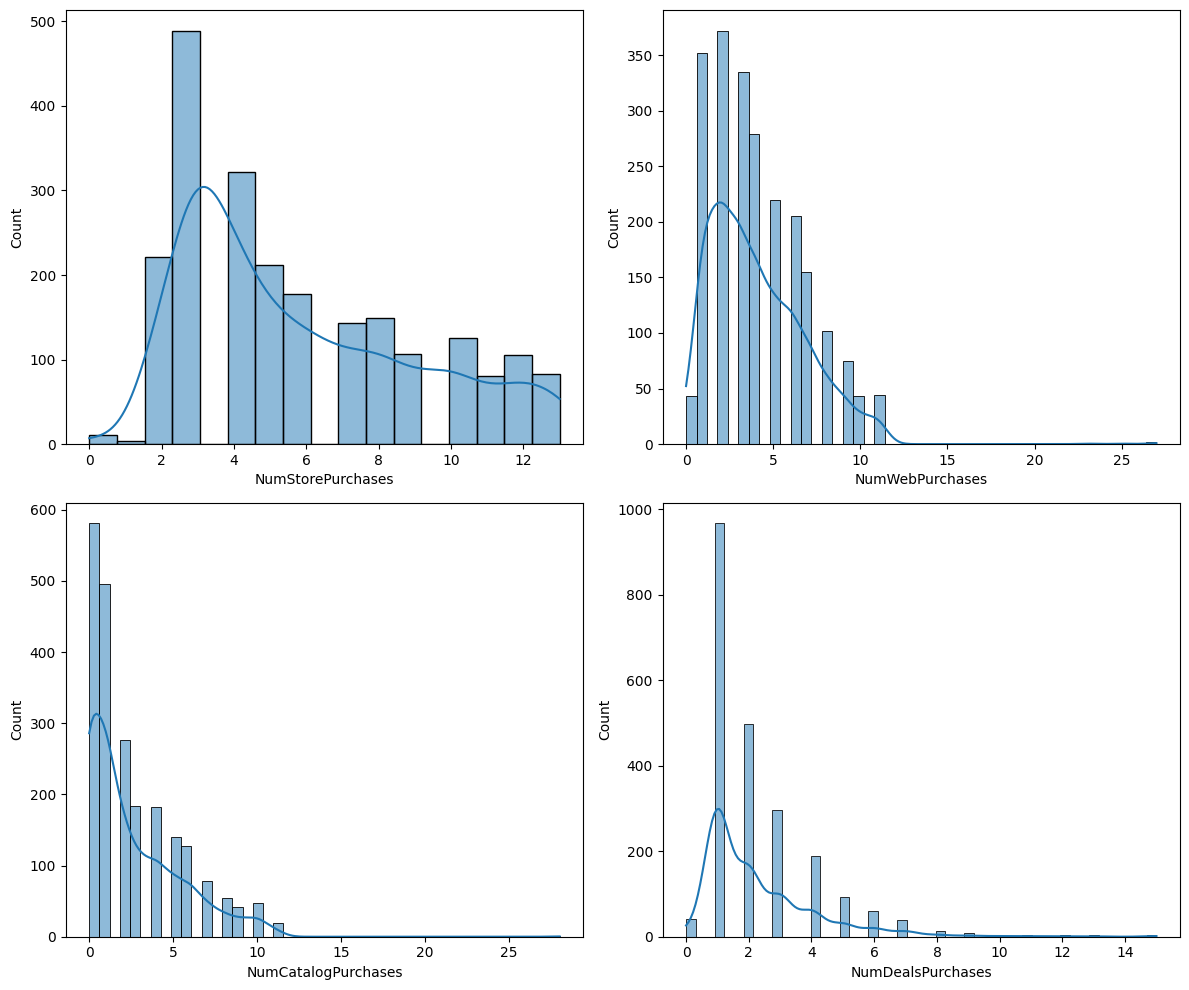

In [11]:
# Looking at the method of buying

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['NumStorePurchases'], kde=True , ax=axes[0,0])

sns.histplot(df['NumWebPurchases'], kde=True, ax=axes[0,1])

# No. of purchase made with Catalogue
sns.histplot(df['NumCatalogPurchases'], kde=True, ax=axes[1,0])

# No. of purchase made with discount
sns.histplot(df['NumDealsPurchases'], kde=True, ax=axes[1,1])

plt.tight_layout()
plt.show()

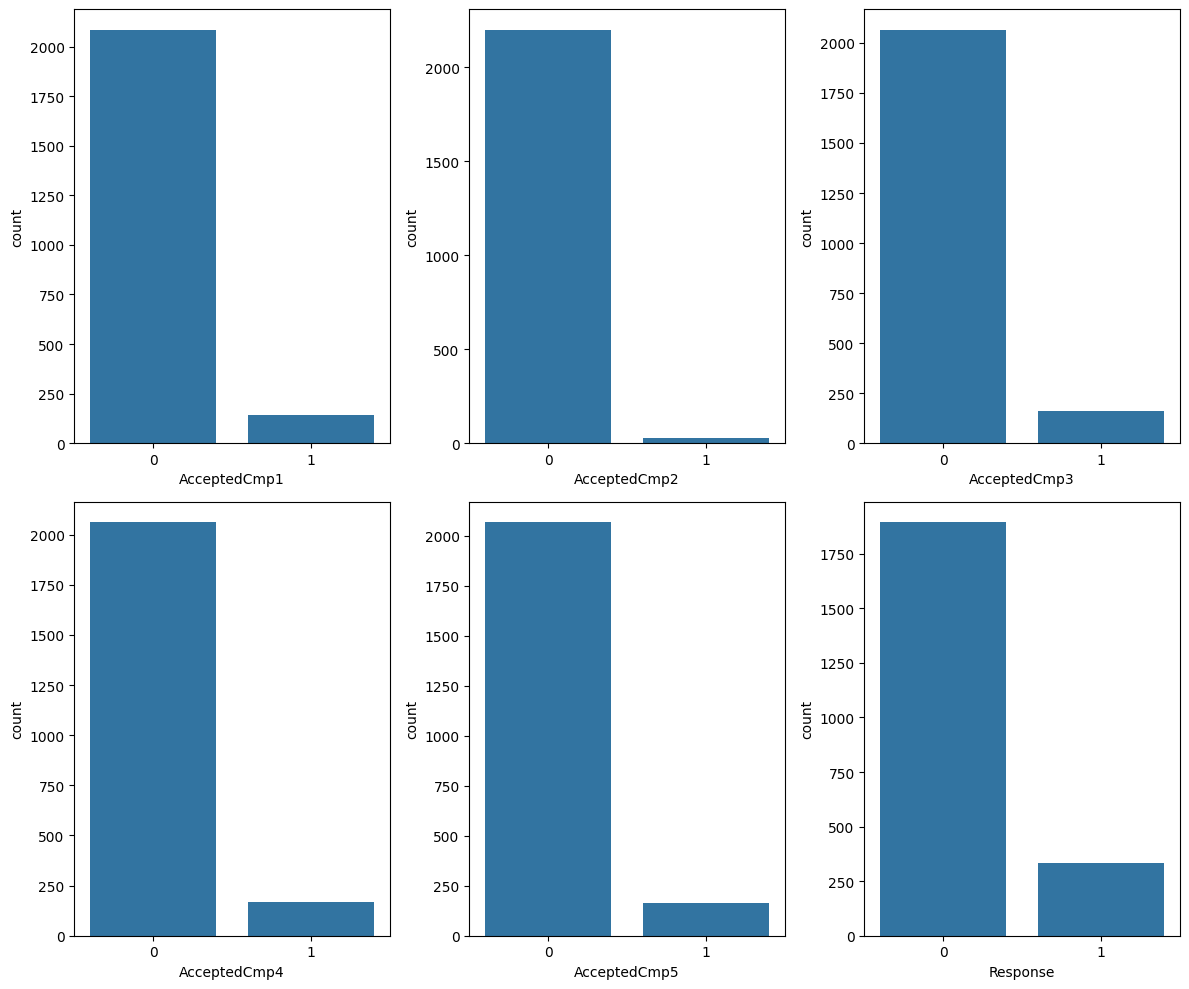

In [12]:
# Looking at the method of buying

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

sns.countplot(x=df['AcceptedCmp1'], ax=axes[0,0])

sns.countplot(x=df['AcceptedCmp2'], ax=axes[0,1])

sns.countplot(x=df['AcceptedCmp3'], ax=axes[0, 2])

sns.countplot(x=df['AcceptedCmp4'], ax=axes[1,0])

sns.countplot(x=df['AcceptedCmp5'], ax=axes[1,1])

sns.countplot(x=df['Response'], ax=axes[1,2])

plt.tight_layout()
plt.show()

In [13]:
# cost and revenue columns have constatnt value
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Dt_Customer'],inplace=True, axis=1)

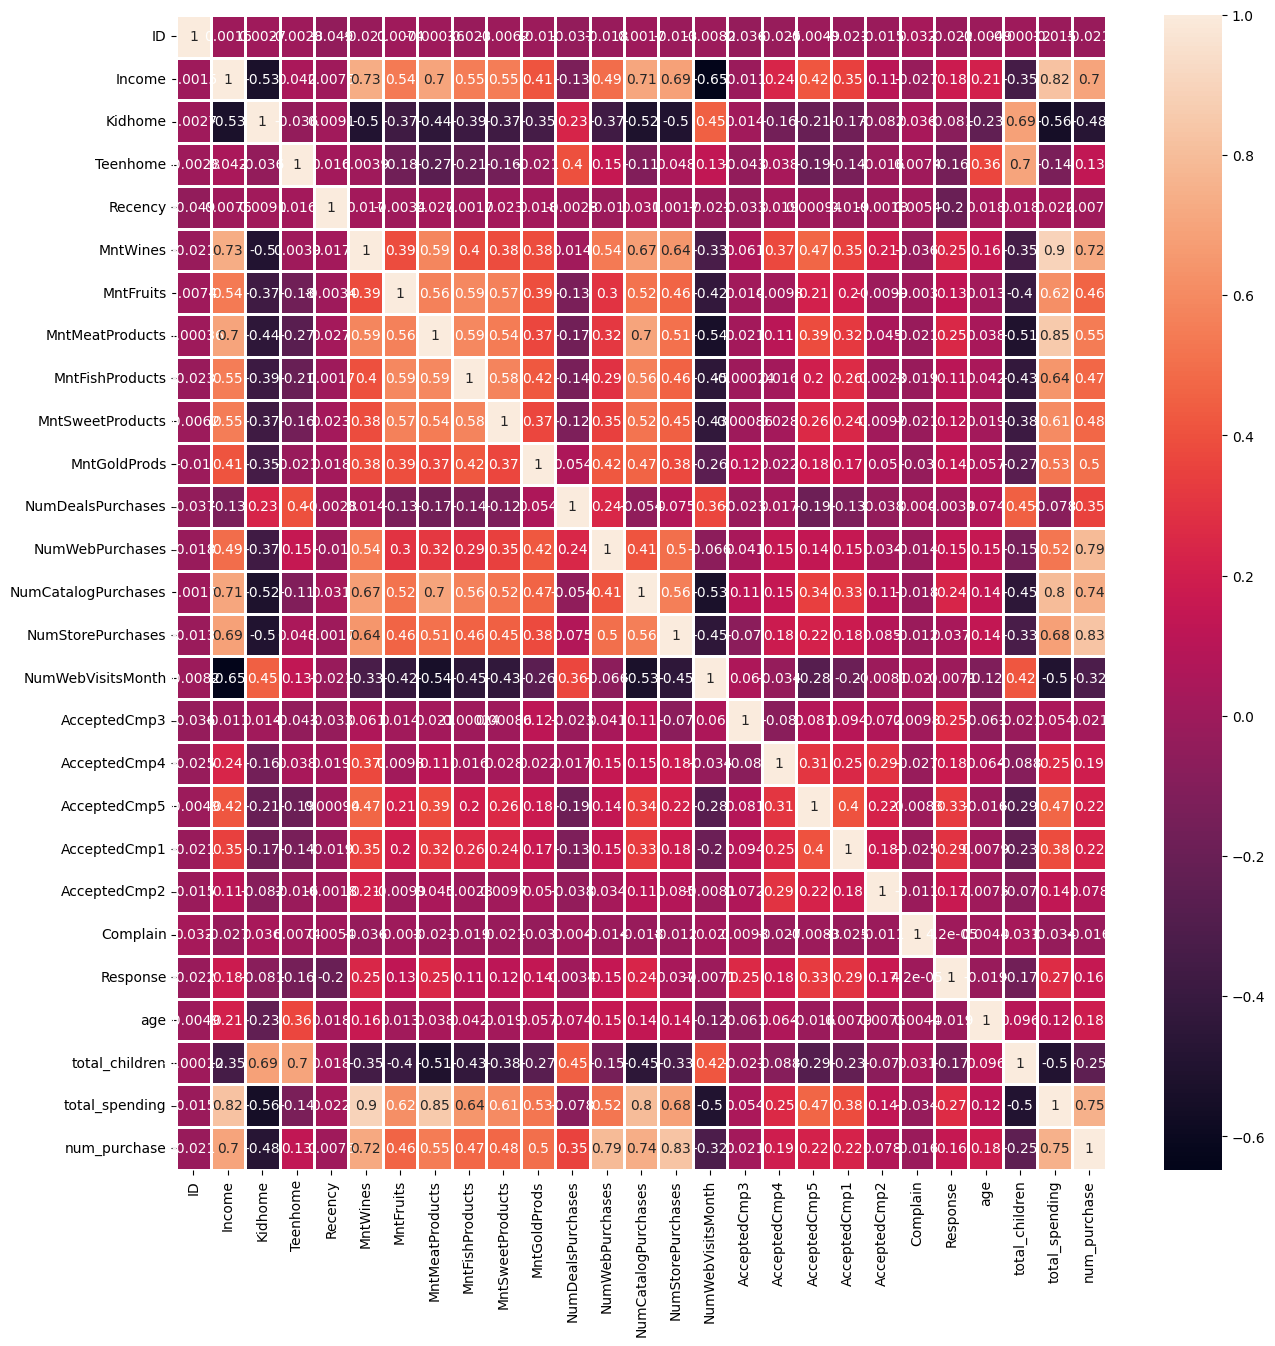

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=1)
plt.show()

<Figure size 640x480 with 0 Axes>

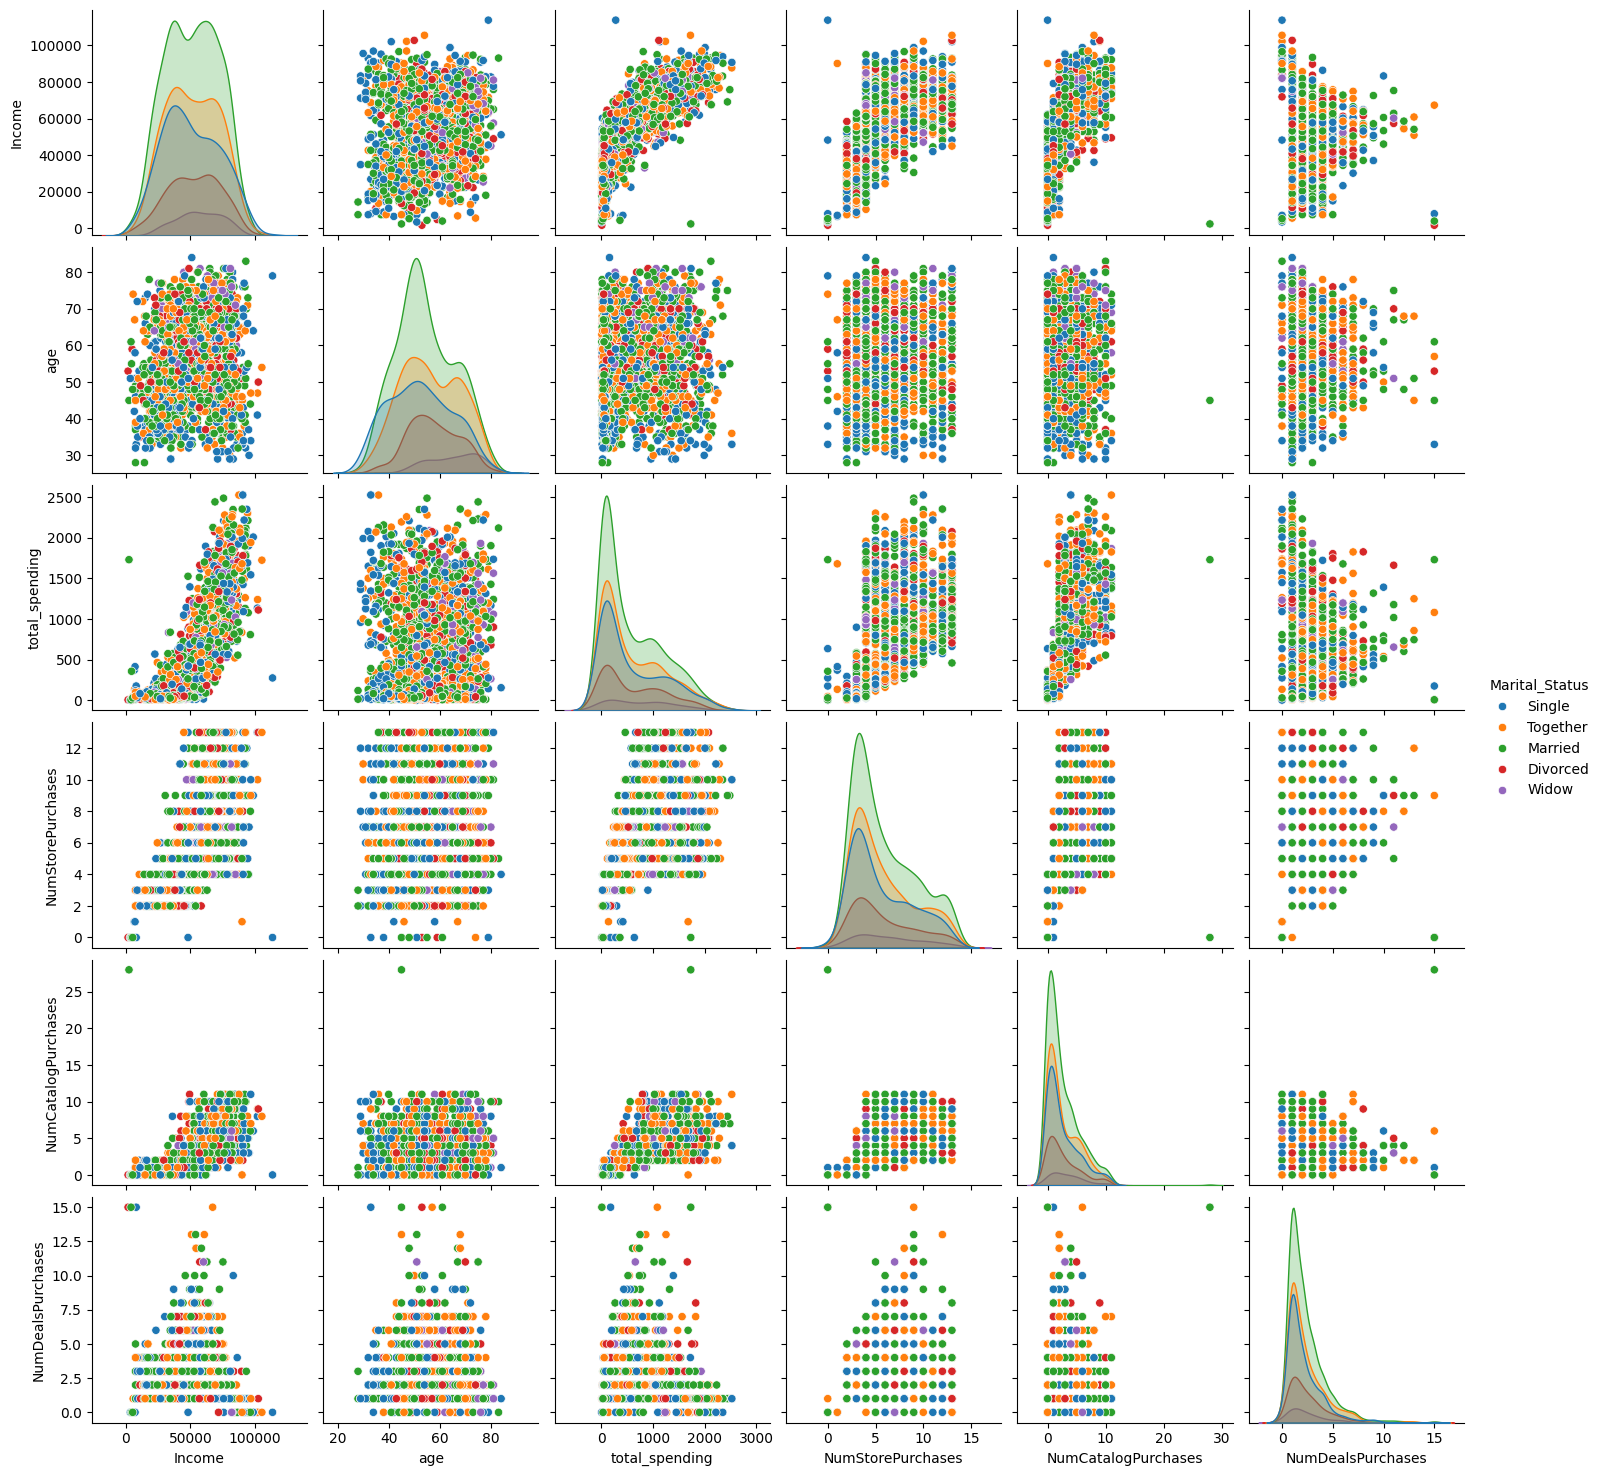

In [18]:
#Plotting following features with hue=Marital_Status
features_to_plot = ["Income", "age", "total_spending", 'Marital_Status', 'NumStorePurchases','NumCatalogPurchases', 'NumDealsPurchases']

plt.figure()
sns.pairplot(df[features_to_plot], hue= "Marital_Status")

plt.show()

<Figure size 640x480 with 0 Axes>

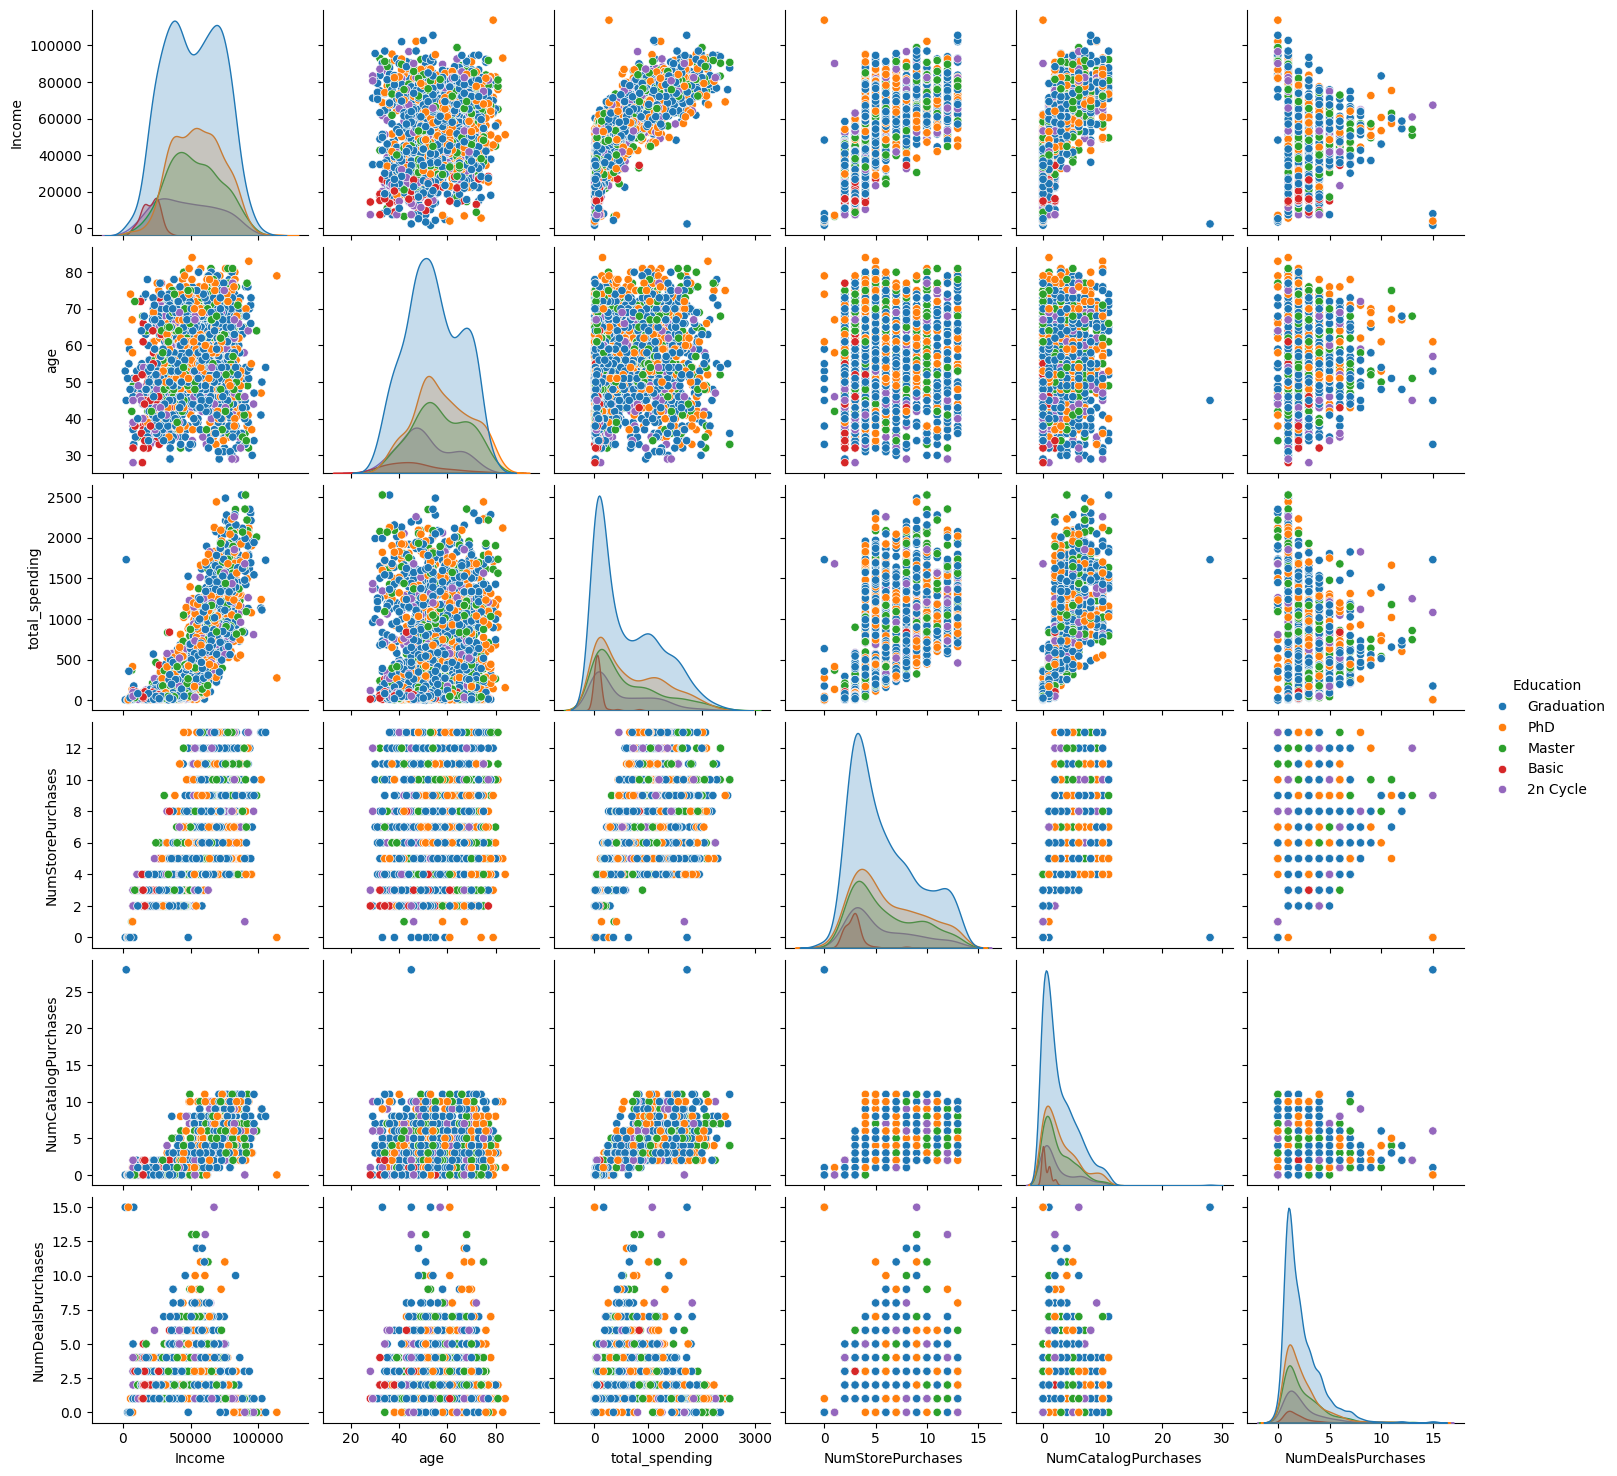

In [19]:
#Plotting following features with hue=Education
features_to_plot = [ "Income", "age", "total_spending", 'Education', 'NumStorePurchases','NumCatalogPurchases', 'NumDealsPurchases']

plt.figure()
sns.pairplot(df[features_to_plot], hue= "Education")

plt.show()

<Figure size 640x480 with 0 Axes>

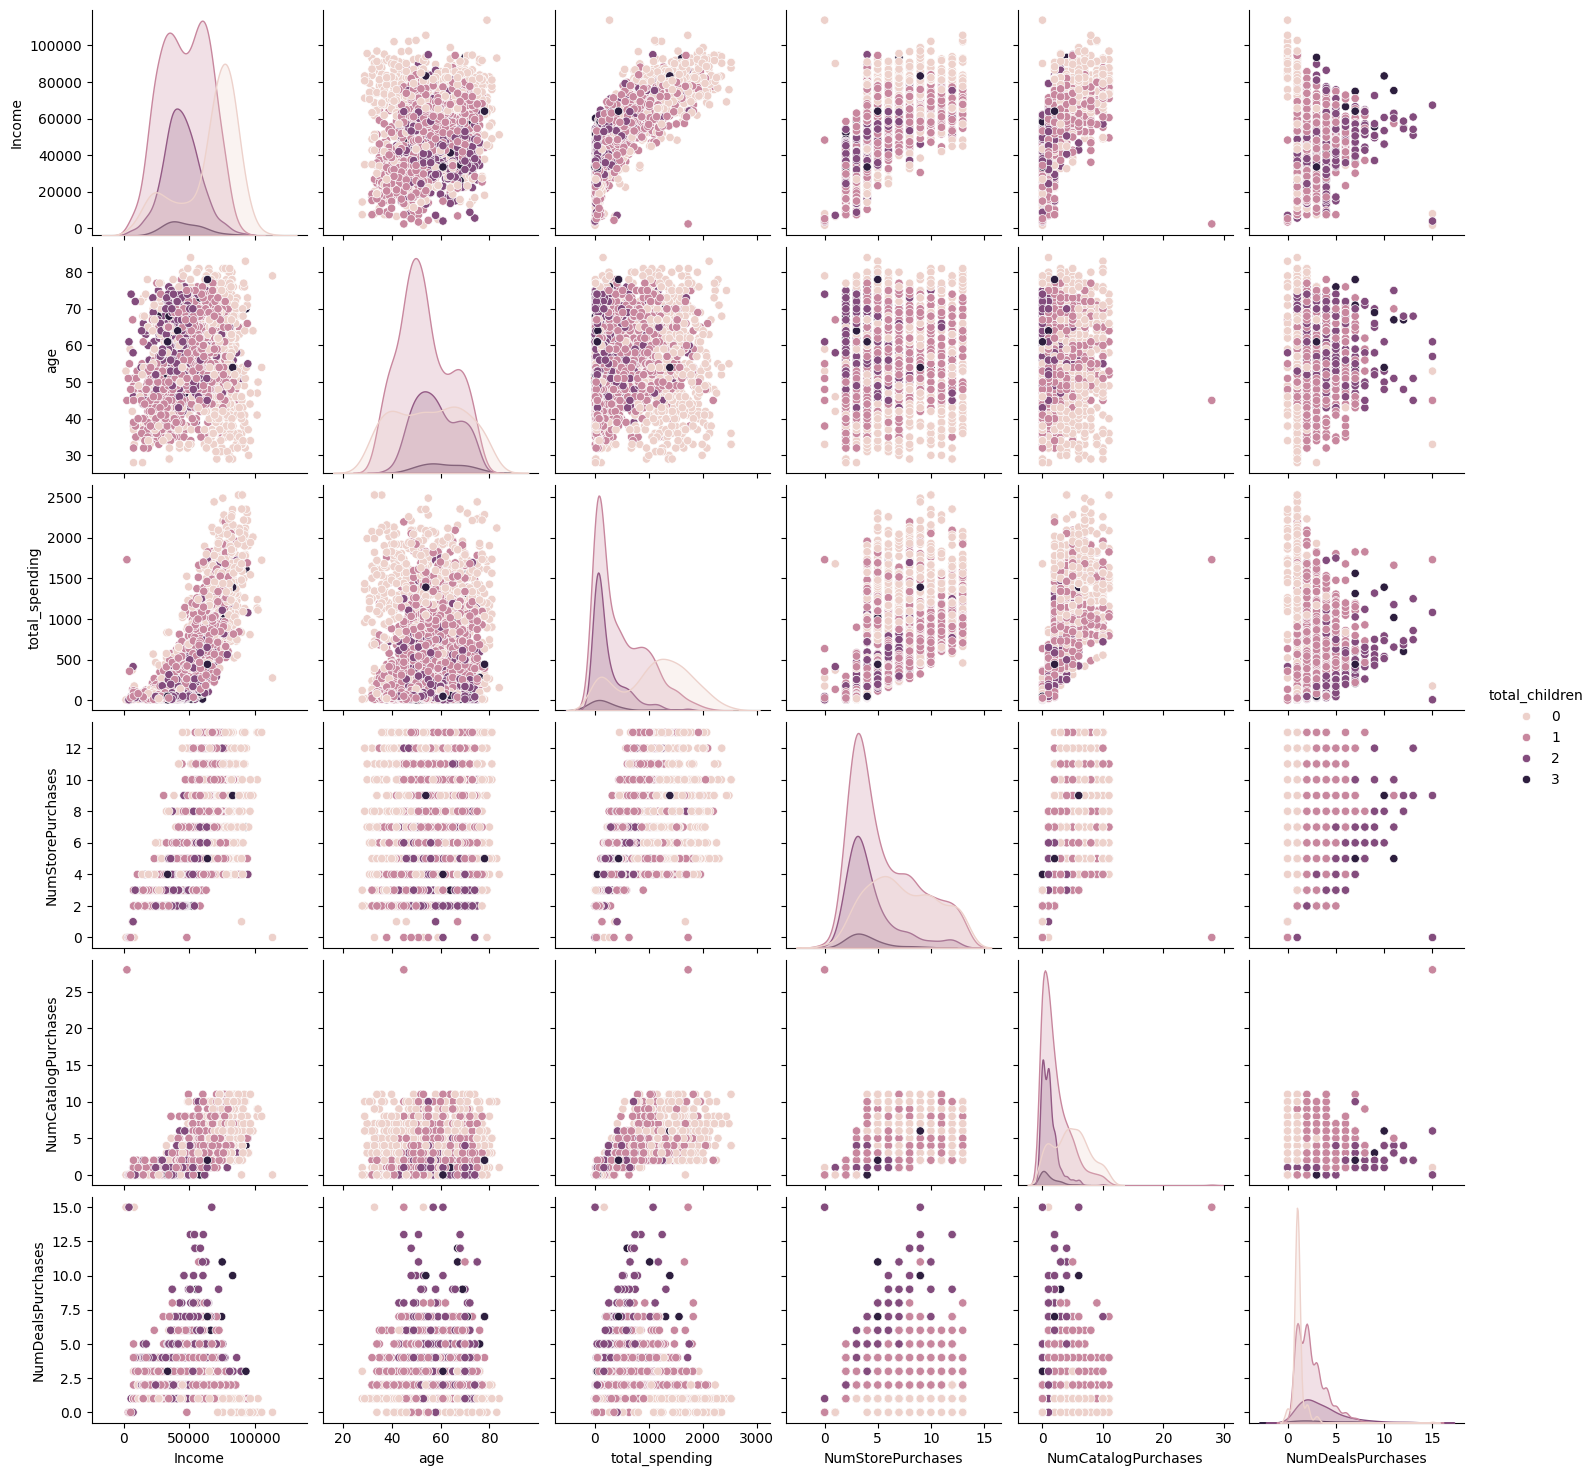

In [20]:
#Plotting following features with hue=Education
features_to_plot = [ "Income", "age", "total_spending", 'total_children', 'NumStorePurchases','NumCatalogPurchases', 'NumDealsPurchases']

plt.figure()
sns.pairplot(df[features_to_plot], hue= "total_children")

plt.show()